In [171]:
# DMS 692: Advanced Statistical Methods in Business Analytics
# Assignment 2 Solution

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')


In [173]:
# Load the dataset
file_path = 'NDAP_REPORT_7057.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataset
data.head()

,ROWID,Country,State lgd code,State,District lgd code,District,YearCode,Year,Class,Number of schools surveyed,...,Average performance of students on learning outcome SST807 Social Science,Average performance of students on learning outcome SST809 Social Science,Average performance of students on learning outcome SST810 Social Science,Average performance of students on learning outcome SST815 Social Science,Average performance of students on learning outcome SST816 Social Science,Average performance of students on learning outcome SST818 Social Science,Average performance of students on learning outcome SST823 Social Science,Average performance of students on learning outcome SST827 Social Science,Average performance of students on learning outcome SST831 Social Science,Average performance of students on learning outcome SST833 Social Science
0,1,India,1,Jammu And Kashmir,1,Anantnag,2017,"Calendar Year (Jan - Dec), 2017",8,204.0,...,82.33,9.88,26.09,26.69,5.97,22.74,25.43,63.16,19.75,62.85
1,2,India,1,Jammu And Kashmir,1,Anantnag,2021,"Calendar Year (Jan - Dec), 2021",8,320.0,...,43.84,45.25,31.03,45.31,42.13,58.41,55.57,46.18,38.84,78.39
2,3,India,1,Jammu And Kashmir,2,Budgam,2017,"Calendar Year (Jan - Dec), 2017",8,204.0,...,52.68,26.67,51.75,49.40,21.04,48.69,36.41,52.08,38.10,60.95
3,4,India,1,Jammu And Kashmir,2,Budgam,2021,"Calendar Year (Jan - Dec), 2021",8,292.0,...,35.72,37.66,24.32,40.71,32.46,43.07,33.25,38.71,33.43,70.93
4,5,India,1,Jammu And Kashmir,3,Baramulla,2017,"Calendar Year (Jan - Dec), 2017",8,172.0,...,57.55,11.93,49.47,52.16,15.63,38.54,25.58,34.89,24.49,40.00


In [174]:
# Check the structure and summary of the dataset
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 66 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   ROWID                                                                      1450 non-null   int64  
 1   Country                                                                    1450 non-null   object 
 2   State lgd code                                                             1450 non-null   int64  
 3   State                                                                      1450 non-null   object 
 4   District lgd code                                                          1450 non-null   int64  
 5   District                                                                   1450 non-null   object 
 6   YearCode                                                

,ROWID,State lgd code,District lgd code,YearCode,Class,Number of schools surveyed,Number of students surveyed,Average performance of students on learning outcome L813 Language,Average performance of students on learning outcome M601 Mathematics,Average performance of students on learning outcome M606 Mathematics,...,Average performance of students on learning outcome SST807 Social Science,Average performance of students on learning outcome SST809 Social Science,Average performance of students on learning outcome SST810 Social Science,Average performance of students on learning outcome SST815 Social Science,Average performance of students on learning outcome SST816 Social Science,Average performance of students on learning outcome SST818 Social Science,Average performance of students on learning outcome SST823 Social Science,Average performance of students on learning outcome SST827 Social Science,Average performance of students on learning outcome SST831 Social Science,Average performance of students on learning outcome SST833 Social Science
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.0,1443.000000,1443.000000,1441.000000,1439.000000,1439.000000,...,1440.000000,1439.000000,1439.000000,1440.000000,1441.000000,1441.000000,1441.000000,1440.000000,1441.000000,1439.000000
mean,725.500000,17.810345,1745.036552,2018.975172,8.0,216.307692,5026.284130,53.749615,43.909174,44.394053,...,41.109076,35.169009,36.178752,39.347232,28.450649,42.161830,33.417606,38.712316,36.551909,58.048696
std,418.723258,9.809533,37113.222518,2.000536,0.0,66.040571,1919.752331,8.175413,10.840249,11.853101,...,10.503286,6.679054,12.865580,13.161174,8.383355,11.159679,10.880043,11.829301,8.983836,10.616824
min,1.000000,1.000000,1.000000,2017.000000,8.0,3.236335,83.380575,13.820000,12.080000,3.700000,...,3.730000,5.150000,2.570000,5.410000,4.990000,0.850000,6.730000,4.350000,7.170000,4.120000
25%,363.250000,9.000000,183.250000,2017.000000,8.0,200.000000,4152.000000,48.690000,36.005000,36.360000,...,35.115000,31.000000,26.320000,30.197500,22.820000,35.170000,25.570000,30.232500,30.330000,51.955000
50%,725.500000,18.000000,365.000000,2017.000000,8.0,204.000000,4996.000000,54.050000,43.310000,44.120000,...,40.735000,34.450000,33.620000,35.410000,27.600000,41.520000,31.760000,36.910000,35.360000,58.630000
75%,1087.750000,24.000000,548.750000,2021.000000,8.0,256.000000,5884.000000,59.110000,51.215000,51.490000,...,47.262500,38.420000,44.175000,46.357500,32.450000,47.860000,39.560000,44.830000,41.090000,64.950788
max,1450.000000,38.000000,999999.000000,2021.000000,8.0,608.000000,17024.000000,76.360000,85.820000,86.260000,...,82.330000,61.950000,83.180000,86.140000,72.960000,80.930000,80.930000,84.560000,79.300000,85.710000


In [175]:
# Select relevant columns for analysis
selected_columns = ['Country', 'State', 'District', 'Year', 'Class',
    'Number of schools surveyed', 'Number of students surveyed',
    'Average performance of students on learning outcome L813 Language',
    'Average performance of students on learning outcome M601 Mathematics',
    'Average performance of students on learning outcome SCI703 Science',
    'Average performance of students on learning outcome SST605 Social Science',
    'Average performance of students on learning outcome M801 Mathematics',
    'Average performance of students on learning outcome SCI801 Science',
    'Average performance of students on learning outcome SST704 Social Science',]                
filtered_data = data[selected_columns]
# Display the filtered dataset
filtered_data.head()

,Country,State,District,Year,Class,Number of schools surveyed,Number of students surveyed,Average performance of students on learning outcome L813 Language,Average performance of students on learning outcome M601 Mathematics,Average performance of students on learning outcome SCI703 Science,Average performance of students on learning outcome SST605 Social Science,Average performance of students on learning outcome M801 Mathematics,Average performance of students on learning outcome SCI801 Science,Average performance of students on learning outcome SST704 Social Science
0,India,Jammu And Kashmir,Anantnag,"Calendar Year (Jan - Dec), 2017",8,204.0,2076.0,35.00,18.97,29.40,22.74,16.92,23.32,9.02
1,India,Jammu And Kashmir,Anantnag,"Calendar Year (Jan - Dec), 2021",8,320.0,4964.0,64.87,62.03,51.32,50.40,45.54,58.89,60.96
2,India,Jammu And Kashmir,Budgam,"Calendar Year (Jan - Dec), 2017",8,204.0,2604.0,48.63,40.00,42.65,45.01,40.18,45.59,16.07
3,India,Jammu And Kashmir,Budgam,"Calendar Year (Jan - Dec), 2021",8,292.0,5108.0,58.49,59.27,46.52,46.71,42.95,52.28,47.45
4,India,Jammu And Kashmir,Baramulla,"Calendar Year (Jan - Dec), 2017",8,172.0,2252.0,45.38,41.75,41.63,41.74,47.84,40.69,4.68


In [179]:
# Dictionary to rename long column names
rename_columns = {
    "Number of schools surveyed": "Schools_Surveyed",
    "Number of students surveyed": "Students_Surveyed",
    "Average performance of students on learning outcome L813 Language": "AVG_L813",
    "Average performance of students on learning outcome M601 Mathematics": "AVG_M601",
    "Average performance of students on learning outcome SCI703 Science": "AVG_SCI703",
    "Average performance of students on learning outcome SST605 Social Science": "AVG_SST605",
    "Average performance of students on learning outcome M801 Mathematics": "AVG_M801",
    "Average performance of students on learning outcome SCI801 Science": "AVG_SCI801",
    "Average performance of students on learning outcome SST704 Social Science": "AVG_SST704"
}

# Convert dictionary to DataFrame
renamecolumns_df = pd.DataFrame(rename_columns.items(), columns=["Original Variable Name", "Renamed Variable Name"])

# Set Pandas display option for better visibility
pd.set_option('display.max_colwidth', None)  # Ensure full text visibility

# Display the table
display(renamecolumns_df)

# Rename columns in the DataFrame
filtered_data = filtered_data.rename(columns=rename_columns)

# Display the new column names
print(filtered_data.columns)


,Original Variable Name,Renamed Variable Name
0,Number of schools surveyed,Schools_Surveyed
1,Number of students surveyed,Students_Surveyed
2,Average performance of students on learning outcome L813 Language,AVG_L813
3,Average performance of students on learning outcome M601 Mathematics,AVG_M601
4,Average performance of students on learning outcome SCI703 Science,AVG_SCI703
5,Average performance of students on learning outcome SST605 Social Science,AVG_SST605
6,Average performance of students on learning outcome M801 Mathematics,AVG_M801
7,Average performance of students on learning outcome SCI801 Science,AVG_SCI801
8,Average performance of students on learning outcome SST704 Social Science,AVG_SST704


Index(['Country', 'State', 'District', 'Year', 'Class', 'Schools_Surveyed',
       'Students_Surveyed', 'AVG_L813', 'AVG_M601', 'AVG_SCI703', 'AVG_SST605',
       'AVG_M801', 'AVG_SCI801', 'AVG_SST704'],
      dtype='object')


In [181]:
import pandas as pd

# Assuming `filtered_data` is your actual DataFrame with all the data loaded
# The variable names you mentioned:
variables = ['Schools_Surveyed', 'Students_Surveyed', 'AVG_L813', 'AVG_M601', 'AVG_SCI703', 'AVG_SST605', 'AVG_M801', 'AVG_SCI801', 'AVG_SST704']

# Function to calculate min-max range and type
def calculate_min_max_range(filtered_data, variables):
    result = []
    
    for var in variables:
        min_val = filtered_data[var].min()
        max_val = filtered_data[var].max()
        
        # If it's 'Schools_Surveyed' or 'Students_Surveyed', convert to integer
        if var in ['Schools_Surveyed', 'Students_Surveyed']:
            min_val = int(min_val)
            max_val = int(max_val)
        
        # Check if it's percentage (AVG_* columns)
        if var.startswith('AVG_'):
            value_type = 'Percentage'
        else:
            # Check if it's an integer or float
            if pd.api.types.is_integer_dtype(filtered_data[var]):
                value_type = 'Integer'
            elif pd.api.types.is_float_dtype(filtered_data[var]):
                value_type = 'Float'
            else:
                value_type = 'Unknown'
        
        result.append([var, f'{min_val} - {max_val}', value_type])
    
    # Return as DataFrame
    return pd.DataFrame(result, columns=['Variable', 'Range', 'Type'])

# Get min-max range and type for selected variables
min_max_df = calculate_min_max_range(filtered_data, variables)

# Display the result
print(min_max_df)


            Variable          Range        Type
0   Schools_Surveyed        3 - 608       Float
1  Students_Surveyed     83 - 17024       Float
2           AVG_L813  13.82 - 76.36  Percentage
3           AVG_M601  12.08 - 85.82  Percentage
4         AVG_SCI703  10.98 - 77.03  Percentage
5         AVG_SST605   10.7 - 89.44  Percentage
6           AVG_M801   6.25 - 69.93  Percentage
7         AVG_SCI801   8.75 - 81.11  Percentage
8         AVG_SST704   3.24 - 82.77  Percentage


In [182]:
df = pd.DataFrame(filtered_data)

# Function to check if a column is categorical or numerical
def check_variable_types(df):
    variable_types = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            variable_types[column] = "Numerical"
        elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == object:
            variable_types[column] = "Categorical"
        else:
            variable_types[column] = "Unknown"
    return variable_types

# Check variable types
variable_types = check_variable_types(df)
print(variable_types)

{'Country': 'Categorical', 'State': 'Categorical', 'District': 'Categorical', 'Year': 'Categorical', 'Class': 'Numerical', 'Schools_Surveyed': 'Numerical', 'Students_Surveyed': 'Numerical', 'AVG_L813': 'Numerical', 'AVG_M601': 'Numerical', 'AVG_SCI703': 'Numerical', 'AVG_SST605': 'Numerical', 'AVG_M801': 'Numerical', 'AVG_SCI801': 'Numerical', 'AVG_SST704': 'Numerical'}


Skewness of Schools_Surveyed: 0.21897251726594996


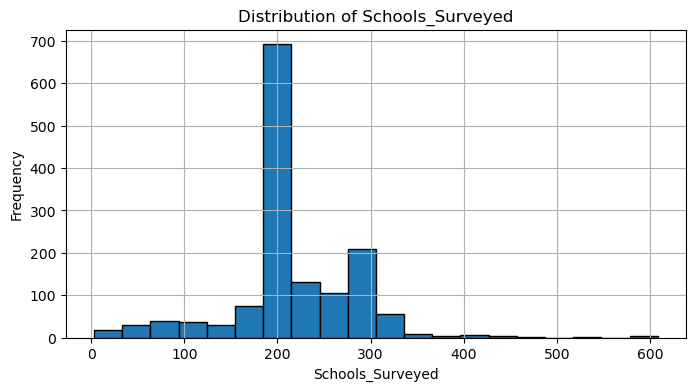

Imputed Schools_Surveyed using Mean with value: 216.30769230769232
Skewness of Students_Surveyed: 0.3951022962788227


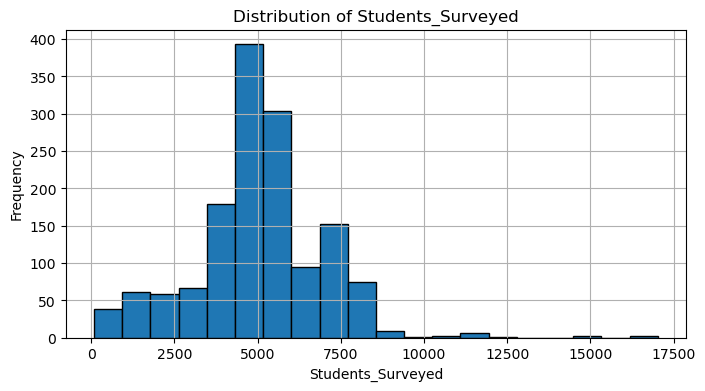

Imputed Students_Surveyed using Mean with value: 5026.284130284131
Skewness of AVG_L813: -0.4976850736389695


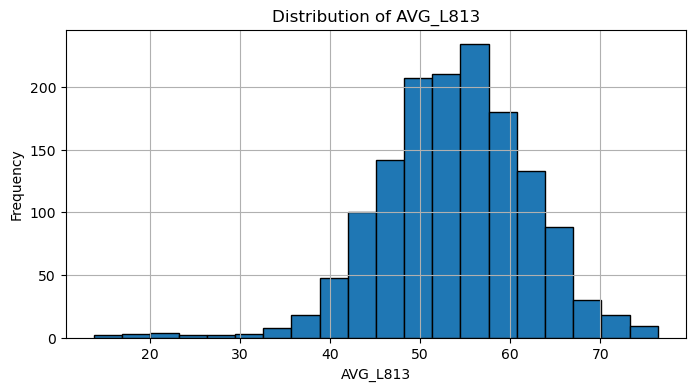

Imputed AVG_L813 using Mean with value: 53.74961502505647
Skewness of AVG_M601: 0.27856642736994675


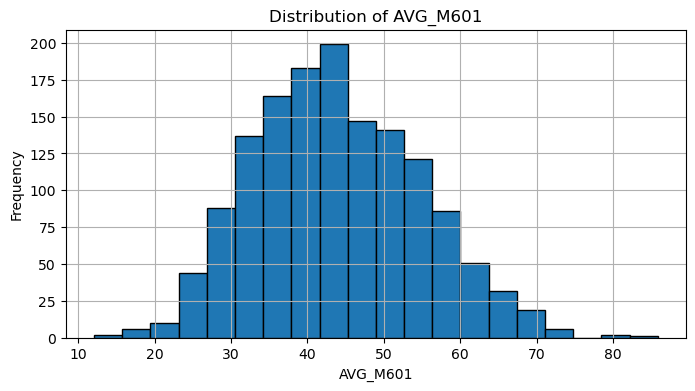

Imputed AVG_M601 using Mean with value: 43.90917424605601
Skewness of AVG_SCI703: 0.825865244677008


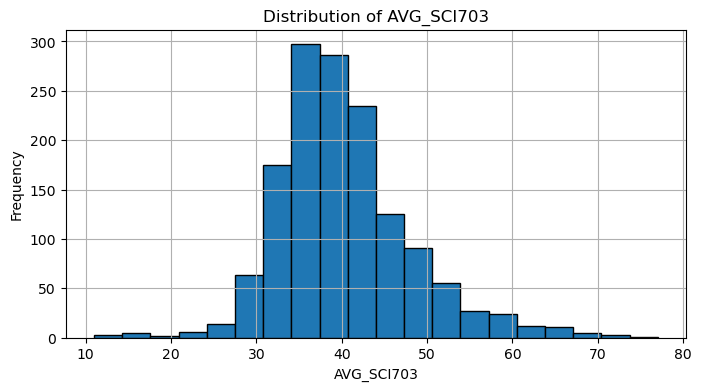

Imputed AVG_SCI703 using Median with value: 39.19
Skewness of AVG_SST605: 0.6129668646808708


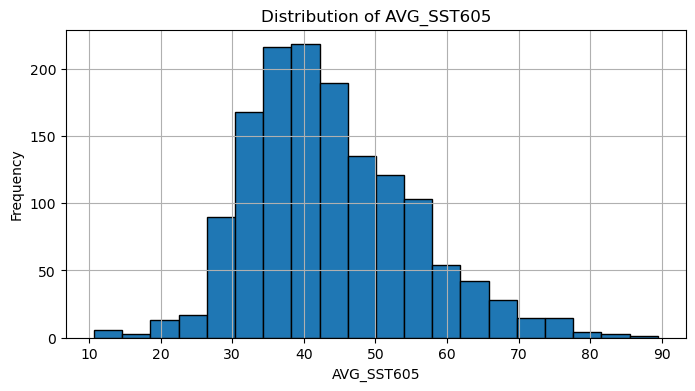

Imputed AVG_SST605 using Median with value: 41.96
Skewness of AVG_M801: 0.6781704840670089


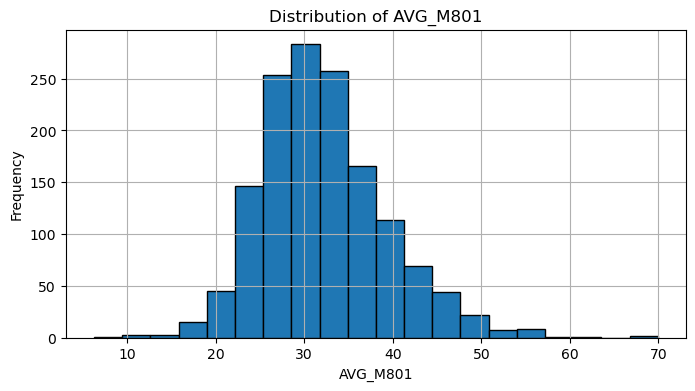

Imputed AVG_M801 using Median with value: 31.369999999999997
Skewness of AVG_SCI801: 0.3325036651880473


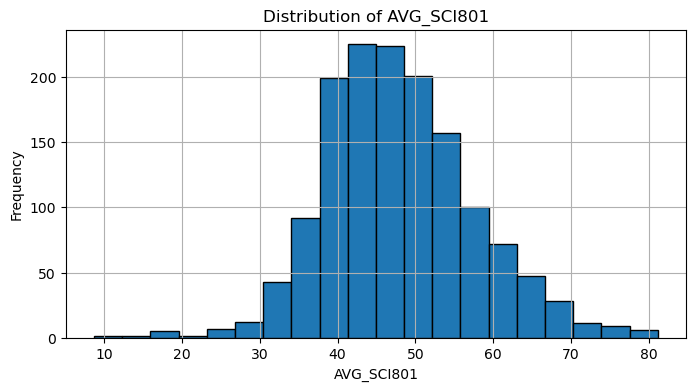

Imputed AVG_SCI801 using Mean with value: 47.96393575009653
Skewness of AVG_SST704: -0.3172563146297691


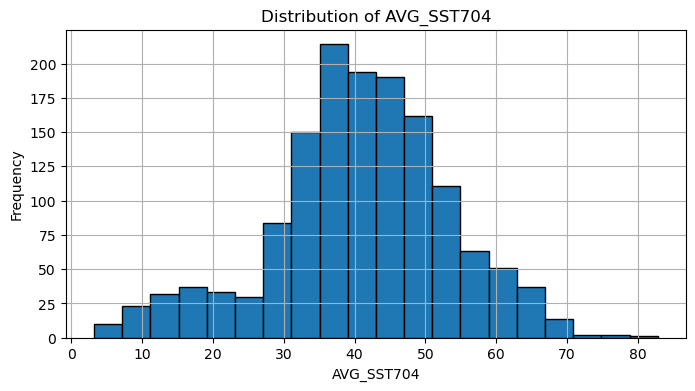

Imputed AVG_SST704 using Mean with value: 40.89279926794164
Country              0
State                0
District             0
Year                 0
Class                0
Schools_Surveyed     0
Students_Surveyed    0
AVG_L813             0
AVG_M601             0
AVG_SCI703           0
AVG_SST605           0
AVG_M801             0
AVG_SCI801           0
AVG_SST704           0
dtype: int64


In [185]:
# Your filtered data
variables = ['Schools_Surveyed', 'Students_Surveyed', 'AVG_L813', 'AVG_M601', 'AVG_SCI703', 
             'AVG_SST605', 'AVG_M801', 'AVG_SCI801', 'AVG_SST704']

# Check skewness and handle missing values based on skewness for each variable
for var in variables:
    if filtered_data[var].isnull().sum() > 0:  # Check if there are missing values
        # Calculate skewness
        skew_value = filtered_data[var].skew()
        print(f"Skewness of {var}: {skew_value}")
        
        # Plot the distribution of the variable to visualize the skewness
        plt.figure(figsize=(8, 4))
        filtered_data[var].hist(bins=20, edgecolor='black')
        plt.title(f"Distribution of {var}")
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.show()

        # Impute based on skewness
        if -0.5 <= skew_value <= 0.5:
            # If skewness is close to 0, use mean
            imputation_value = filtered_data[var].mean()
            imputation_method = 'Mean'
        elif skew_value > 0:
            # If skewness is positive, use median
            imputation_value = filtered_data[var].median()
            imputation_method = 'Median'
        else:
            # If skewness is negative, use median
            imputation_value = filtered_data[var].median()
            imputation_method = 'Median'
        
        # Impute missing values with the chosen strategy
        filtered_data[var].fillna(imputation_value, inplace=True)
        
        print(f"Imputed {var} using {imputation_method} with value: {imputation_value}")
    else:
        print(f"No missing data for {var}")

# Verify if all missing values have been handled
print(filtered_data.isnull().sum())      

In [186]:
filtered_data['State'].unique()

array(['Jammu And Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Bihar', 'Sikkim', 'Arunachal Pradesh', 'Nagaland', 'Manipur',
       'Mizoram', 'Tripura', 'Meghalaya', 'Assam', 'West Bengal',
       'Jharkhand', 'Odisha', 'Chhattisgarh', 'Madhya Pradesh', 'Gujarat',
       'Maharashtra', 'Andhra Pradesh', 'Karnataka', 'Lakshadweep', 'Goa',
       'Kerala', 'Tamil Nadu', 'Puducherry',
       'Andaman And Nicobar Islands', 'Telangana', 'Ladakh',
       'The Dadra And Nagar Haveli And Daman And Diu'], dtype=object)

In [203]:
# Display the first few rows of the dataset
df = pd.DataFrame(filtered_data)
print("Dataset Preview:")
df.head()

# 1a. Briefly describe the dataset
print("\n# 1a. Dataset Description")
print(f"Dimension of the dataset: {df.shape[0]} rows x {df.shape[1]} columns")
print("\nVariable names:")
for col in df.columns:
    print(f"- {col}")

print("\nData types:")
print(df.dtypes)

print("\nSummary statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

# 1b. Two-group hypothesis test
print("\n# 1b. Two-group hypothesis test")

# Selecting two states for comparison
state1 = 'Uttar Pradesh'
state2 = 'Bihar'
two_states_df = df[df['State'].isin([state1, state2])]

print(f"Comparing {state1} and {state2}")
df.index = df.index + 1  # Shift index to start from 1
df.to_csv("NDAP_REPORT_7057_UPDATED.csv", index=True, index_label="ROWID")  # Save with "RowID" as the index column

Dataset Preview:

# 1a. Dataset Description
Dimension of the dataset: 1450 rows x 14 columns

Variable names:
- Country
- State
- District
- Year
- Class
- Schools_Surveyed
- Students_Surveyed
- AVG_L813
- AVG_M601
- AVG_SCI703
- AVG_SST605
- AVG_M801
- AVG_SCI801
- AVG_SST704

Data types:
Country               object
State                 object
District              object
Year                  object
Class                  int64
Schools_Surveyed     float64
Students_Surveyed    float64
AVG_L813             float64
AVG_M601             float64
AVG_SCI703           float64
AVG_SST605           float64
AVG_M801             float64
AVG_SCI801           float64
AVG_SST704           float64
dtype: object

Summary statistics:
        Class  Schools_Surveyed  Students_Surveyed     AVG_L813     AVG_M601  \
count  1450.0       1450.000000        1450.000000  1450.000000  1450.000000   
mean      8.0        216.307692        5026.284130    53.749615    43.909174   
std       0.0         65.880

In [205]:
# i. Specify null and alternative hypothesis
print("\ni. Null and Alternative Hypothesis:")
print("H0: The means of the dependent variables are equal across the two states.")
print("H1: The means of the dependent variables are not equal across the two states.")

# ii. Define test statistic and critical value
print("\nii. Test Statistic and Critical Value:")
print("We will use the independent two-sample t-test to compare means.")
print("The test statistic follows a t-distribution with degrees of freedom calculated using the Welch-Satterthwaite equation.")

# Define dependent variables to test
dependent_vars = ['AVG_L813', 'AVG_M601', 'AVG_SCI703', 'AVG_SST605', 'AVG_M801', 'AVG_SCI801', 'AVG_SST704']

# Initialize dictionary to store results
t_test_results = {}

# Perform t-test for each dependent variable
alpha = 0.05
for var in dependent_vars:
    state1_data = two_states_df[two_states_df['State'] == state1][var].dropna()
    state2_data = two_states_df[two_states_df['State'] == state2][var].dropna()
    
    # Perform t-test
    t_stat, p_val = stats.ttest_ind(state1_data, state2_data, equal_var=False)
    
    # Critical value
    df_welch = ((state1_data.var()/state1_data.size + state2_data.var()/state2_data.size)**2) / \
                ((state1_data.var()/state1_data.size)**2/(state1_data.size-1) + 
                 (state2_data.var()/state2_data.size)**2/(state2_data.size-1))
    critical_value = stats.t.ppf(1-alpha/2, df_welch)
    
    # Store results
    t_test_results[var] = {
        'Variable': var,
        'T-statistic': t_stat,
        'P-value': p_val,
        'Critical Value': critical_value,
        'Decision (Critical Value)': 'Reject H0' if abs(t_stat) > critical_value else 'Fail to Reject H0',
        'Decision (P-value)': 'Reject H0' if p_val < alpha else 'Fail to Reject H0'
    }

# Display t-test results
t_test_df = pd.DataFrame.from_dict(t_test_results, orient='index')
print("\nT-test Results:")
print(t_test_df[['T-statistic', 'P-value', 'Critical Value', 'Decision (Critical Value)', 'Decision (P-value)']])


i. Null and Alternative Hypothesis:
H0: The means of the dependent variables are equal across the two states.
H1: The means of the dependent variables are not equal across the two states.

ii. Test Statistic and Critical Value:
We will use the independent two-sample t-test to compare means.
The test statistic follows a t-distribution with degrees of freedom calculated using the Welch-Satterthwaite equation.

T-test Results:
            T-statistic   P-value  Critical Value Decision (Critical Value)  \
AVG_L813      -4.045073  0.000074        1.971506                 Reject H0   
AVG_M601      -4.313381  0.000031        1.977883                 Reject H0   
AVG_SCI703    -2.798057  0.005589        1.970611                 Reject H0   
AVG_SST605    -4.721555  0.000004        1.970956                 Reject H0   
AVG_M801      -3.339084  0.001036        1.974229                 Reject H0   
AVG_SCI801    -4.965274  0.000001        1.971091                 Reject H0   
AVG_SST704    -0.7

In [207]:
import pandas as pd
from scipy import stats

# Function to perform t-test for two groups
def perform_t_test(df, state1, state2, variable):
    # Select data for the two states
    data1 = df[df['State'] == state1][variable]
    data2 = df[df['State'] == state2][variable]
    
    # Test for equal variances using Levene's test
    levene_stat, levene_p = stats.levene(data1, data2)
    equal_var = levene_p > 0.05  # True if variances are equal

    # Perform independent t-test
    t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=equal_var)
    
    print(f"Variable: {variable}")
    print(f"Levene's test p-value: {levene_p:.4f} (Equal variances: {equal_var})")
    print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
    print("-" * 50)

# Example usage for multiple dependent variables
dependent_variables = ['AVG_L813', 'AVG_M601', 'AVG_SCI703', 'AVG_SST605', 'AVG_M801', 'AVG_SCI801', 'AVG_SST704']

for variable in dependent_variables:
    perform_t_test(df, 'Uttar Pradesh', 'Bihar', variable)


Variable: AVG_L813
Levene's test p-value: 0.0376 (Equal variances: False)
t-statistic: -4.0451, p-value: 0.0001
--------------------------------------------------
Variable: AVG_M601
Levene's test p-value: 0.0254 (Equal variances: False)
t-statistic: -4.3134, p-value: 0.0000
--------------------------------------------------
Variable: AVG_SCI703
Levene's test p-value: 0.0001 (Equal variances: False)
t-statistic: -2.7981, p-value: 0.0056
--------------------------------------------------
Variable: AVG_SST605
Levene's test p-value: 0.0012 (Equal variances: False)
t-statistic: -4.7216, p-value: 0.0000
--------------------------------------------------
Variable: AVG_M801
Levene's test p-value: 0.4124 (Equal variances: True)
t-statistic: -3.2120, p-value: 0.0015
--------------------------------------------------
Variable: AVG_SCI801
Levene's test p-value: 0.0004 (Equal variances: False)
t-statistic: -4.9653, p-value: 0.0000
--------------------------------------------------
Variable: AVG_SST

In [195]:
# iii. State decision based on both methods
print("\niii. Decision based on Critical Value and P-value methods:")
for var, result in t_test_results.items():
    print(f"For {var}:")
    print(f"  Critical Value Method: {result['Decision (Critical Value)']}")
    print(f"  P-value Method: {result['Decision (P-value)']}")

# iv. Assumptions and evaluation
print("\niv. Assumptions for Two-Sample T-test:")
print("1. Independence: The samples are randomly selected and independent.")
print("2. Normality: The data in each group follows a normal distribution.")
print("3. Equal Variances (Optional): We used Welch's t-test which doesn't require equal variances.")

# Check normality assumption
print("\nEvaluating Normality Assumption:")
for var in dependent_vars:
    state1_data = two_states_df[two_states_df['State'] == state1][var].dropna()
    state2_data = two_states_df[two_states_df['State'] == state2][var].dropna()
    
    # Shapiro-Wilk test for normality
    _, p_val_state1 = stats.shapiro(state1_data)
    _, p_val_state2 = stats.shapiro(state2_data)
    
    print(f"Shapiro-Wilk Test for {var}:")
    print(f"  {state1}: p-value = {p_val_state1:.4f} ({'Normal' if p_val_state1 > 0.05 else 'Not Normal'})")
    print(f"  {state2}: p-value = {p_val_state2:.4f} ({'Normal' if p_val_state2 > 0.05 else 'Not Normal'})")

# Visual check for normality (QQ plot)
plt.figure(figsize=(12, 10))
for i, var in enumerate(dependent_vars[:4]):  # First 4 variables for brevity
    state1_data = two_states_df[two_states_df['State'] == state1][var].dropna()
    state2_data = two_states_df[two_states_df['State'] == state2][var].dropna()
    
    plt.subplot(2, 2, i+1)
    stats.probplot(state1_data, dist="norm", plot=plt)
    plt.title(f"QQ Plot for {var} - {state1}")
plt.tight_layout()
plt.savefig('normality_qq_plots_state1.png')
plt.close()

plt.figure(figsize=(12, 10))
for i, var in enumerate(dependent_vars[:4]):  # First 4 variables for brevity
    state1_data = two_states_df[two_states_df['State'] == state1][var].dropna()
    state2_data = two_states_df[two_states_df['State'] == state2][var].dropna()
    
    plt.subplot(2, 2, i+1)
    stats.probplot(state2_data, dist="norm", plot=plt)
    plt.title(f"QQ Plot for {var} - {state2}")
plt.tight_layout()
plt.savefig('normality_qq_plots_state2.png')
plt.close()


iii. Decision based on Critical Value and P-value methods:
For AVG_L813:
  Critical Value Method: Reject H0
  P-value Method: Reject H0
For AVG_M601:
  Critical Value Method: Reject H0
  P-value Method: Reject H0
For AVG_SCI703:
  Critical Value Method: Reject H0
  P-value Method: Reject H0
For AVG_SST605:
  Critical Value Method: Reject H0
  P-value Method: Reject H0
For AVG_M801:
  Critical Value Method: Reject H0
  P-value Method: Reject H0
For AVG_SCI801:
  Critical Value Method: Reject H0
  P-value Method: Reject H0
For AVG_SST704:
  Critical Value Method: Fail to Reject H0
  P-value Method: Fail to Reject H0

iv. Assumptions for Two-Sample T-test:
1. Independence: The samples are randomly selected and independent.
2. Normality: The data in each group follows a normal distribution.
3. Equal Variances (Optional): We used Welch's t-test which doesn't require equal variances.

Evaluating Normality Assumption:
Shapiro-Wilk Test for AVG_L813:
  Uttar Pradesh: p-value = 0.0001 (Not Nor

In [196]:
print("\nEvaluating Equal Variance Assumption:")
for var in dependent_vars:
    state1_data = two_states_df[two_states_df['State'] == state1][var].dropna()
    state2_data = two_states_df[two_states_df['State'] == state2][var].dropna()
    
    # Levene's test for equal variances
    _, p_val_levene = stats.levene(state1_data, state2_data)
    
    print(f"Levene's Test for {var}: p-value = {p_val_levene:.4f} ({'Equal Variances' if p_val_levene > 0.05 else 'Unequal Variances'})")

# v. Conclusion for two-group test
print("\nv. Conclusion for Two-Group Hypothesis Test:")
significant_vars = [var for var, result in t_test_results.items() if result['P-value'] < alpha]
non_significant_vars = [var for var, result in t_test_results.items() if result['P-value'] >= alpha]

if significant_vars:
    print(f"We found significant differences between {state1} and {state2} for the following variables:")
    for var in significant_vars:
        mean1 = two_states_df[two_states_df['State'] == state1][var].mean()
        mean2 = two_states_df[two_states_df['State'] == state2][var].mean()
        print(f"  - {var}: {state1} mean = {mean1:.2f}, {state2} mean = {mean2:.2f}")

if non_significant_vars:
    print(f"\nWe did not find significant differences between {state1} and {state2} for the following variables:")
    for var in non_significant_vars:
        mean1 = two_states_df[two_states_df['State'] == state1][var].mean()
        mean2 = two_states_df[two_states_df['State'] == state2][var].mean()
        print(f"  - {var}: {state1} mean = {mean1:.2f}, {state2} mean = {mean2:.2f}")

print("\nRegarding assumptions, we used Welch's t-test which doesn't require equal variances.")
print("The normality assumption may not be perfectly met for all variables based on the Shapiro-Wilk test.")
print("However, t-tests are generally robust to moderate violations of normality with sufficient sample sizes.")

# 1c. Multi-group hypothesis test
print("\n# 1c. Multi-group hypothesis test")

# Select multiple states for comparison (at least 3)
selected_states = ['Uttar Pradesh', 'Bihar','Maharashtra', 'Telangana','Rajasthan']
multi_states_df = df[df['State'].isin(selected_states)]

print(f"Comparing the following states: {', '.join(selected_states)}")

# i. Null and alternative hypothesis
print("\ni. Null and Alternative Hypothesis:")
print("H0: The means of the dependent variables are equal across all selected states.")
print("H1: At least one state has a different mean for at least one dependent variable.")

# ii. Assumptions
print("\nii. Assumptions for ANOVA:")
print("1. Independence: The samples are randomly selected and independent.")
print("2. Normality: The data in each group follows a normal distribution.")
print("3. Equal Variances: The variances across groups are approximately equal.")

# iii. Test statistic choice
print("\niii. Test Statistic Choice:")
print("We will use One-Way ANOVA (F-test) to compare means across multiple groups.")
print("Justification: ANOVA is appropriate for comparing means across more than two groups of a categorical variable.")
print("Additionally, we'll use MANOVA for multivariate analysis of all dependent variables simultaneously.")

# Perform ANOVA for each dependent variable
anova_results = {}
for var in dependent_vars:
    # Perform one-way ANOVA
    model = ols(f'{var} ~ C(State)', data=multi_states_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Store results
    anova_results[var] = {
        'Variable': var,
        'F-statistic': anova_table['F'][0],
        'P-value': anova_table['PR(>F)'][0],
        'Decision': 'Reject H0' if anova_table['PR(>F)'][0] < alpha else 'Fail to Reject H0'
    }

# Display ANOVA results
anova_df = pd.DataFrame.from_dict(anova_results, orient='index')
print("\nOne-Way ANOVA Results for Each Dependent Variable:")
print(anova_df[['F-statistic', 'P-value', 'Decision']])


print("\nMultivariate Test for State Effects:")
print("We'll examine if there's a collective effect of State on all dependent variables.")

# Count significant ANOVAs
sig_count = sum(1 for var, result in anova_results.items() if result['P-value'] < alpha)
total_count = len(dependent_vars)
print(f"Number of significant ANOVAs: {sig_count} out of {total_count} dependent variables")

if sig_count > 0:
    print("Since there are significant effects in individual ANOVAs, we can conclude that State has a significant effect on at least some of the academic performance measures.")
else:
    print("No significant State effects were detected in any of the individual ANOVAs.")

# iv. Decision based on p-value
print("\niv. Decision based on P-value method:")
for var, result in anova_results.items():
    print(f"For {var}: {result['Decision']} (p-value = {result['P-value']:.4f})")



Evaluating Equal Variance Assumption:
Levene's Test for AVG_L813: p-value = 0.0376 (Unequal Variances)
Levene's Test for AVG_M601: p-value = 0.0254 (Unequal Variances)
Levene's Test for AVG_SCI703: p-value = 0.0001 (Unequal Variances)
Levene's Test for AVG_SST605: p-value = 0.0012 (Unequal Variances)
Levene's Test for AVG_M801: p-value = 0.4124 (Equal Variances)
Levene's Test for AVG_SCI801: p-value = 0.0004 (Unequal Variances)
Levene's Test for AVG_SST704: p-value = 0.1226 (Equal Variances)

v. Conclusion for Two-Group Hypothesis Test:
We found significant differences between Uttar Pradesh and Bihar for the following variables:
  - AVG_L813: Uttar Pradesh mean = 49.02, Bihar mean = 52.91
  - AVG_M601: Uttar Pradesh mean = 43.86, Bihar mean = 49.29
  - AVG_SCI703: Uttar Pradesh mean = 36.57, Bihar mean = 38.74
  - AVG_SST605: Uttar Pradesh mean = 39.74, Bihar mean = 44.68
  - AVG_M801: Uttar Pradesh mean = 30.83, Bihar mean = 33.16
  - AVG_SCI801: Uttar Pradesh mean = 42.89, Bihar mea

In [211]:
import pandas as pd
import numpy as np
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Formula for MANOVA
formula1 = ' + '.join(dependent_vars) + ' ~ State'  # e.g., 'AVG_L813 + AVG_M601 ~ State'
formula2 = ' + '.join(dependent_vars) + ' ~ Schools_Surveyed'  # e.g., 'AVG_L813 + AVG_M601 ~ State'
formula3 = ' + '.join(dependent_vars) + ' ~ Students_Surveyed'  # e.g., 'AVG_L813 + AVG_M601 ~ State'
# a. Perform MANOVA
maov1 = MANOVA.from_formula(formula1, data=multi_states_df)
maov2 = MANOVA.from_formula(formula2, data=multi_states_df)
maov3 = MANOVA.from_formula(formula3, data=multi_states_df)
print("MANOVA Results:")
print(maov1.mv_test())
print(maov2.mv_test())
print(maov3.mv_test())

MANOVA Results:
                   Multivariate linear model
                                                                
----------------------------------------------------------------
        Intercept         Value  Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
           Wilks' lambda  0.0594 7.0000 417.0000 942.4938 0.0000
          Pillai's trace  0.9406 7.0000 417.0000 942.4938 0.0000
  Hotelling-Lawley trace 15.8212 7.0000 417.0000 942.4938 0.0000
     Roy's greatest root 15.8212 7.0000 417.0000 942.4938 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
         State          Value   Num DF   Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.1153 28.0000 1504.9371  44.1064 0.0000
         Pillai's trace 1.467

In [209]:
# v. Evaluate assumptions
print("\nv. Evaluating Assumptions for ANOVA:")

# Check normality by group
print("\nNormality Check by Group:")
for var in dependent_vars[:7]:  # First 7 variables for brevity
    print(f"\nVariable: {var}")
    for state in selected_states:
        state_data = multi_states_df[multi_states_df['State'] == state][var].dropna()
        if len(state_data) > 3:  # Need at least 3 observations for Shapiro-Wilk
            _, p_val = stats.shapiro(state_data)
            print(f"  {state}: Shapiro-Wilk p-value = {p_val:.4f} ({'Normal' if p_val > 0.05 else 'Not Normal'})")
        else:
            print(f"  {state}: Not enough data for normality test")

# Check homogeneity of variances
print("\nHomogeneity of Variances Check:")
for var in dependent_vars:
    # Levene's test for homogeneity of variances
    groups = [multi_states_df[multi_states_df['State'] == state][var].dropna() for state in selected_states]
    groups = [group for group in groups if len(group) > 0]  # Filter out empty groups
    
    if len(groups) > 1:  # Need at least 2 groups for Levene's test
        try:
            _, p_val_levene = stats.levene(*groups)
            print(f"{var}: Levene's test p-value = {p_val_levene:.4f} ({'Equal Variances' if p_val_levene > 0.05 else 'Unequal Variances'})")
        except Exception as e:
            print(f"{var}: Could not perform Levene's test due to: {str(e)}")
    else:
        print(f"{var}: Not enough groups for homogeneity test")

# Visual check of distributions
plt.figure(figsize=(15, 10))
for i, var in enumerate(dependent_vars[:4]):  # First 4 variables for brevity
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='State', y=var, data=multi_states_df)
    plt.title(f'Distribution of {var} by State')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplots_by_state.png')
plt.close()

# Post-hoc tests for significant ANOVA results
print("\nPost-hoc Tests for Significant ANOVA Results:")
for var, result in anova_results.items():
    if result['P-value'] < alpha:
        # Perform Tukey HSD test
        try:
            posthoc = pairwise_tukeyhsd(multi_states_df[var].dropna(), 
                                         multi_states_df['State'][multi_states_df[var].notna()], 
                                         alpha=alpha)
            print(f"\nTukey HSD for {var}:")
            print(posthoc)
        except Exception as e:
            print(f"Could not perform Tukey HSD for {var} due to: {str(e)}")

# vi. Conclusion for multi-group test
print("\nvi. Conclusion for Multi-Group Hypothesis Test:")
significant_vars_anova = [var for var, result in anova_results.items() if result['P-value'] < alpha]
non_significant_vars_anova = [var for var, result in anova_results.items() if result['P-value'] >= alpha]

if significant_vars_anova:
    print(f"We found significant differences across states for the following variables:")
    for var in significant_vars_anova:
        print(f"  - {var}: F = {anova_results[var]['F-statistic']:.2f}, p-value = {anova_results[var]['P-value']:.4f}")
        # Add means by state
        means_by_state = multi_states_df.groupby('State')[var].mean().round(2)
        print(f"    Means by state: {means_by_state.to_dict()}")

if non_significant_vars_anova:
    print(f"\nWe did not find significant differences across states for the following variables:")
    for var in non_significant_vars_anova:
        print(f"  - {var}: F = {anova_results[var]['F-statistic']:.2f}, p-value = {anova_results[var]['P-value']:.4f}")

print("\nRegarding assumptions:")
print("The normality assumption may not be perfectly met for all state-variable combinations.")
print("- The homogeneity of variances assumption may not be met for all variables.")
print("- ANOVA is generally robust to moderate violations of these assumptions with balanced sample sizes.")
print("- For variables where assumptions are severely violated, non-parametric alternatives like the Kruskal-Wallis test could be considered.")


v. Evaluating Assumptions for ANOVA:

Normality Check by Group:

Variable: AVG_L813
  Uttar Pradesh: Shapiro-Wilk p-value = 0.0001 (Not Normal)
  Bihar: Shapiro-Wilk p-value = 0.1569 (Normal)
  Maharashtra: Shapiro-Wilk p-value = 0.3706 (Normal)
  Telangana: Shapiro-Wilk p-value = 0.1110 (Normal)
  Rajasthan: Shapiro-Wilk p-value = 0.3534 (Normal)

Variable: AVG_M601
  Uttar Pradesh: Shapiro-Wilk p-value = 0.0124 (Not Normal)
  Bihar: Shapiro-Wilk p-value = 0.0868 (Normal)
  Maharashtra: Shapiro-Wilk p-value = 0.2812 (Normal)
  Telangana: Shapiro-Wilk p-value = 0.1575 (Normal)
  Rajasthan: Shapiro-Wilk p-value = 0.4165 (Normal)

Variable: AVG_SCI703
  Uttar Pradesh: Shapiro-Wilk p-value = 0.0001 (Not Normal)
  Bihar: Shapiro-Wilk p-value = 0.1726 (Normal)
  Maharashtra: Shapiro-Wilk p-value = 0.0062 (Not Normal)
  Telangana: Shapiro-Wilk p-value = 0.0079 (Not Normal)
  Rajasthan: Shapiro-Wilk p-value = 0.0866 (Normal)

Variable: AVG_SST605
  Uttar Pradesh: Shapiro-Wilk p-value = 0.000

In [88]:
# 2. Multivariate Regression
print("\n# 2. Multivariate Regression Analysis")

# a. Fit multivariate regression model
print("\na. Multivariate Regression Model:")

# Define the categorical variable (State) and continuous variable (Schools_Surveyed)
# We'll create dummy variables for State
states_dummies = pd.get_dummies(df['State'], prefix='State', drop_first=True)

# Prepare data for multivariate regression
X = pd.concat([states_dummies, df[['Schools_Surveyed']]], axis=1)
Y = df[dependent_vars]

# Drop rows with missing values
valid_idx = ~(X.isna().any(axis=1) | Y.isna().any(axis=1))
X_clean = X[valid_idx]
Y_clean = Y[valid_idx]


# 2. Multivariate Regression Analysis

a. Multivariate Regression Model:


In [131]:
# Regression model
model = sm.OLS.from_formula(
    formula='AVG_L813 ~ C(State) + Students_Surveyed + Schools_Surveyed',
    data=df
).fit(cov_type='HC3')

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               AVG_L813   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     21.46
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          2.96e-108
Time:                        18:06:44   Log-Likelihood:                -4824.5
No. Observations:                1450   AIC:                             9723.
Df Residuals:                    1413   BIC:                             9918.
Df Model:                          36                                         
Covariance Type:                  HC3                                         
                                                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [90]:
# Regression model
model = sm.OLS.from_formula(
    formula='AVG_M601  ~ C(State) + Students_Surveyed',
    data=df
).fit(cov_type='HC3')

print(model.summary().tables[1])

                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   33.0267      4.612      7.161      0.000      23.987      42.066
C(State)[T.Andhra Pradesh]                                   2.0954      4.865      0.431      0.667      -7.440      11.631
C(State)[T.Arunachal Pradesh]                                2.7120      4.887      0.555      0.579      -6.866      12.290
C(State)[T.Assam]                                            6.4842      4.722      1.373      0.170      -2.771      15.739
C(State)[T.Bihar]                                            6.7003      4.748      1.411      0.158      -2.605      16.006
C(State)[T.Chandigarh]                                       4.7703     23.500      0.203      0.839     -41.289      50.829


In [91]:
# Regression model
model = sm.OLS.from_formula(
    formula='AVG_SCI703  ~ C(State) + Students_Surveyed',
    data=df
).fit(cov_type='HC3')

print(model.summary().tables[1])

                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   36.2555      3.277     11.063      0.000      29.832      42.679
C(State)[T.Andhra Pradesh]                                   9.9860      3.626      2.754      0.006       2.880      17.092
C(State)[T.Arunachal Pradesh]                                3.7254      3.321      1.122      0.262      -2.784      10.235
C(State)[T.Assam]                                            7.4338      3.321      2.239      0.025       0.925      13.942
C(State)[T.Bihar]                                            5.0900      3.304      1.540      0.123      -1.386      11.566
C(State)[T.Chandigarh]                                      16.0333      3.546      4.522      0.000       9.084      22.983


In [92]:
# Regression model
model = sm.OLS.from_formula(
    formula='AVG_SST605  ~ C(State) + Students_Surveyed',
    data=df
).fit(cov_type='HC3')

print(model.summary().tables[1])

                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   40.4598      1.709     23.672      0.000      37.110      43.810
C(State)[T.Andhra Pradesh]                                  12.4201      2.601      4.775      0.000       7.322      17.518
C(State)[T.Arunachal Pradesh]                                0.0697      1.935      0.036      0.971      -3.724       3.863
C(State)[T.Assam]                                           12.6802      1.978      6.412      0.000       8.804      16.556
C(State)[T.Bihar]                                           11.2670      1.819      6.195      0.000       7.702      14.832
C(State)[T.Chandigarh]                                      26.5319      8.056      3.294      0.001      10.743      42.321


In [93]:
# Regression model
model = sm.OLS.from_formula(
    formula='AVG_M801 ~ C(State) + Students_Surveyed',
    data=df
).fit(cov_type='HC3')

print(model.summary().tables[1])

                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   27.4576      3.086      8.897      0.000      21.409      33.506
C(State)[T.Andhra Pradesh]                                   6.6296      3.353      1.977      0.048       0.059      13.201
C(State)[T.Arunachal Pradesh]                               -0.6169      3.164     -0.195      0.845      -6.817       5.584
C(State)[T.Assam]                                            2.9905      3.154      0.948      0.343      -3.192       9.173
C(State)[T.Bihar]                                            3.2584      3.115      1.046      0.296      -2.847       9.364
C(State)[T.Chandigarh]                                      10.8372      6.617      1.638      0.101      -2.132      23.806


In [101]:
# Regression model
model = sm.OLS.from_formula(
    formula='AVG_SCI801 ~ C(State) + Students_Surveyed',
    data=df
).fit(cov_type='HC3')

print(model.summary().tables[1])

                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   45.4807      5.076      8.960      0.000      35.532      55.429
C(State)[T.Andhra Pradesh]                                   8.6062      5.332      1.614      0.107      -1.845      19.057
C(State)[T.Arunachal Pradesh]                                3.5307      5.113      0.691      0.490      -6.490      13.552
C(State)[T.Assam]                                            9.2282      5.174      1.784      0.074      -0.913      19.369
C(State)[T.Bihar]                                            5.0433      5.073      0.994      0.320      -4.900      14.987
C(State)[T.Chandigarh]                                      20.1227      5.715      3.521      0.000       8.922      31.323


In [103]:
# Regression model
model = sm.OLS.from_formula(
    formula='AVG_SST704 ~ C(State) + Students_Surveyed',
    data=df
).fit(cov_type='HC3')

print(model.summary().tables[1])

                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   35.7575      4.226      8.461      0.000      27.474      44.041
C(State)[T.Andhra Pradesh]                                  -0.4995      4.765     -0.105      0.917      -9.839       8.840
C(State)[T.Arunachal Pradesh]                               -9.3780      4.467     -2.100      0.036     -18.132      -0.624
C(State)[T.Assam]                                            6.1324      4.323      1.419      0.156      -2.340      14.605
C(State)[T.Bihar]                                           -2.9355      4.318     -0.680      0.497     -11.399       5.528
C(State)[T.Chandigarh]                                       4.4807     16.718      0.268      0.789     -28.285      37.247


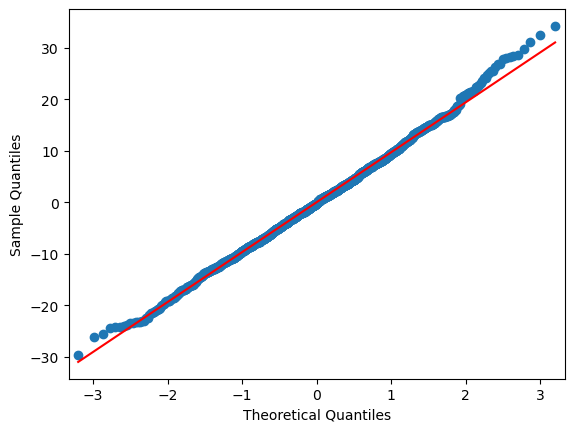

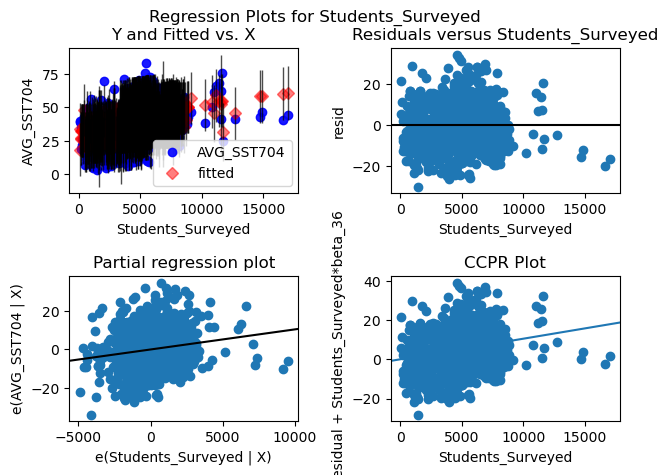

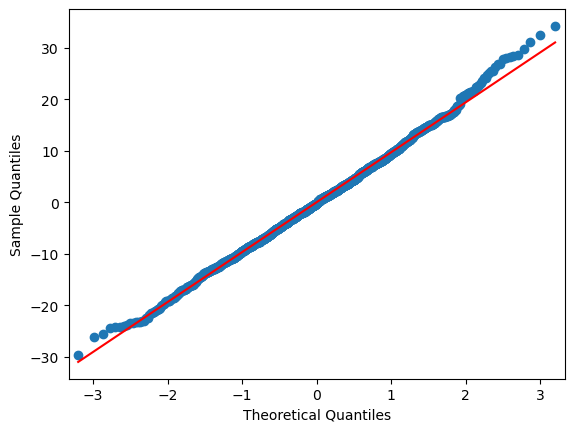

In [109]:
# Diagnostic plots
sm.graphics.plot_regress_exog(model, 'Students_Surveyed')
sm.qqplot(model.resid, line='s')